In [4]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("HP_engine.csv")
df.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
6653,Chevrolet,Malibu Hybrid,2008,regular unleaded,164.0,4.0,AUTOMATIC,front wheel drive,4.0,Hybrid,Midsize,Sedan,32,24,1385,23640
3869,Hyundai,Elantra,2016,regular unleaded,145.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Sedan,37,27,1439,21700
7029,Nissan,Murano,2015,regular unleaded,260.0,6.0,AUTOMATIC,all wheel drive,4.0,Crossover,Midsize,4dr SUV,28,21,2009,40600
7802,Infiniti,Q50,2017,premium unleaded (required),208.0,4.0,AUTOMATIC,all wheel drive,4.0,Luxury,Midsize,Sedan,28,22,190,35950
7830,Infiniti,Q60 Convertible,2015,premium unleaded (recommended),325.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Midsize,Convertible,24,16,190,53400


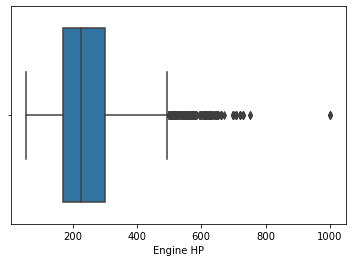

In [5]:
# With and without Outliers
sns.boxplot(x=df['Engine HP'])

In [6]:
# Sacar cuartiles

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

Year                    9.00
Engine HP             130.00
Engine Cylinders        2.00
Number of Doors         2.00
highway MPG             8.00
city mpg                6.00
Popularity           1460.00
MSRP                21231.25
dtype: float64

In [7]:
# Límite superior antes de outlier
ls = (Q3 + 1.5 * IQR)
ls

Year                 2029.500
Engine HP             495.000
Engine Cylinders        9.000
Number of Doors         7.000
highway MPG            42.000
city mpg               31.000
Popularity           4199.000
MSRP                74078.125
dtype: float64

In [8]:
# Límite inferior antes de outlier
li = (Q1 - (1.5 * IQR))
li

Year                 1993.500
Engine HP             -25.000
Engine Cylinders        1.000
Number of Doors        -1.000
highway MPG            10.000
city mpg                7.000
Popularity          -1641.000
MSRP               -10846.875
dtype: float64

In [9]:
df.shape

(11914, 16)

In [10]:
df_hp_with_outiers = df[((df < li) |(df > ls)).any(axis=1)]
df_hp_with_outiers.shape

(2830, 16)

In [11]:
df_hp_with_outiers["Engine HP"]

17       172.0
18       172.0
19       172.0
20       172.0
21       172.0
         ...  
11794    145.0
11810    106.0
11903    394.0
11904    394.0
11905    394.0
Name: Engine HP, Length: 2830, dtype: float64

¿Por qué aparecen aparecen más valores aparte de los que son outliers en la columna "Engine HP"? Porque con la fórmula también se quitan los outliers de las demás columnas.

In [13]:
df_hp_with_outiers["Engine HP"].max()

1001.0

In [14]:
df_hp_with_outiers["Engine HP"].min()

55.0

In [ ]:
li_A = -25
ls_A = 495

li_B = 0
ls_B = 500

A = [1001, 55, -26]
B = [400, 2000, 0]

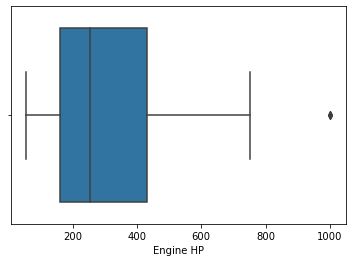

In [33]:
# Without Outliers
sns.boxplot(x=df_hp_with_outiers['Engine HP'])

In [25]:
df_without_outliers = df[~((df < li) |(df > ls)).any(axis=1)]
df_without_outliers.shape

(9084, 16)

In [26]:
df_without_outliers["Engine HP"]

0        335.0
1        300.0
2        300.0
3        230.0
4        230.0
         ...  
11909    300.0
11910    300.0
11911    300.0
11912    300.0
11913    221.0
Name: Engine HP, Length: 9084, dtype: float64

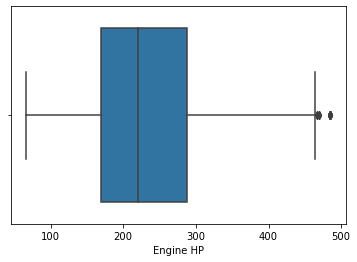

In [29]:
# Without Outliers
sns.boxplot(x=df_without_outliers['Engine HP'])

In [27]:
df_without_outliers["Engine HP"].max()

485.0

In [28]:
df_without_outlers["Engine HP"].min()

66.0

La decisión de eliminar cada outlier depende de cada problema

In [35]:
# Coger solo los outliers de Engine HP
# límite inferior
li_hp = li["Engine HP"]
ls_hp = ls["Engine HP"]

df_engineHP_column = df["Engine HP"]

# Cogemos solo los outliers de la columna Engine HP
df_engineHP_with_outiers = df[((df["Engine HP"] < li_hp) |(df["Engine HP"] > ls_hp))]
engine_hp_filtered = df_engineHP_with_outiers["Engine HP"]
engine_hp_filtered.shape

(509,)

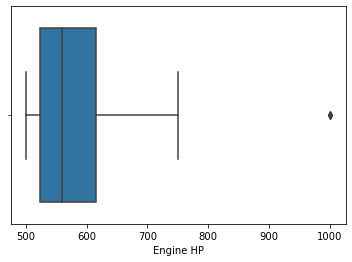

In [37]:
# Engine HP ONL Outliers
sns.boxplot(x=engine_hp_filtered)